In [1]:
'''
https://www.kaggle.com/prakharrathi25/weather-data-clustering-using-k-means
'''

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from itertools import cycle, islice
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

%matplotlib inline

data = pd.read_csv('data/minute_weather.csv')

data.head()

,rowID,hpwren_timestamp,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,min_wind_direction,min_wind_speed,rain_accumulation,rain_duration,relative_humidity
0,0,2011-09-10 00:00:49,912.3,64.76,97.0,1.2,106.0,1.6,85.0,1.0,NaN,NaN,60.5
1,1,2011-09-10 00:01:49,912.3,63.86,161.0,0.8,215.0,1.5,43.0,0.2,0.0,0.0,39.9
2,2,2011-09-10 00:02:49,912.3,64.22,77.0,0.7,143.0,1.2,324.0,0.3,0.0,0.0,43.0
3,3,2011-09-10 00:03:49,912.3,64.40,89.0,1.2,112.0,1.6,12.0,0.7,0.0,0.0,49.5
4,4,2011-09-10 00:04:49,912.3,64.40,185.0,0.4,260.0,1.0,100.0,0.1,0.0,0.0,58.8


In [2]:
sampled_df = data[(data['rowID'] % 10) == 0]
sampled_df.shape

(158726, 13)

In [3]:
sampled_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
rowID,158726.0,793625.000000,458203.937510,0.00,396812.5,793625.00,1190437.50,1587250.00
air_pressure,158726.0,916.830161,3.051717,905.00,914.8,916.70,918.70,929.50
air_temp,158726.0,61.851589,11.833569,31.64,52.7,62.24,70.88,99.50
avg_wind_direction,158680.0,162.156100,95.278201,0.00,62.0,182.00,217.00,359.00
avg_wind_speed,158680.0,2.775215,2.057624,0.00,1.3,2.20,3.80,31.90
max_wind_direction,158680.0,163.462144,92.452139,0.00,68.0,187.00,223.00,359.00
max_wind_speed,158680.0,3.400558,2.418802,0.10,1.6,2.70,4.60,36.00
min_wind_direction,158680.0,166.774017,97.441109,0.00,76.0,180.00,212.00,359.00
min_wind_speed,158680.0,2.134664,1.742113,0.00,0.8,1.60,3.00,31.60
rain_accumulation,158725.0,0.000318,0.011236,0.00,0.0,0.00,0.00,3.12


In [8]:
sampled_df[sampled_df['rain_accumulation'] == 0].shape

(157812, 13)

In [9]:
sampled_df[sampled_df['rain_duration'] == 0].shape

(157237, 13)

In [4]:
del sampled_df['rain_accumulation']
del sampled_df['rain_duration']

In [5]:
rows_before = sampled_df.shape[0]
sampled_df = sampled_df.dropna()
rows_after = sampled_df.shape[0]
rows_before, rows_after

(158726, 158680)

In [16]:
sampled_df.columns

Index(['rowID', 'hpwren_timestamp', 'air_pressure', 'air_temp',
       'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction',
       'max_wind_speed', 'min_wind_direction', 'min_wind_speed',
       'relative_humidity'],
      dtype='object')

In [36]:
features = ['air_pressure', 'air_temp', 'avg_wind_direction', 'avg_wind_speed', 'max_wind_direction', 'max_wind_speed','relative_humidity']

In [8]:
select_df = sampled_df[features]

In [9]:
select_df.columns
select_df

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity
0,912.3,64.76,97.0,1.2,106.0,1.6,60.5
10,912.3,62.24,144.0,1.2,167.0,1.8,38.5
20,912.2,63.32,100.0,2.0,122.0,2.5,58.3
30,912.2,62.60,91.0,2.0,103.0,2.4,57.9
40,912.2,64.04,81.0,2.6,88.0,2.9,57.4
50,912.1,63.68,102.0,1.2,119.0,1.5,51.4
60,912.0,64.04,83.0,0.7,101.0,0.9,51.4
70,911.9,64.22,82.0,2.0,97.0,2.4,62.2
80,911.9,61.70,67.0,3.3,70.0,3.5,71.5
90,911.9,61.34,67.0,3.6,75.0,4.2,72.5


In [15]:
X = StandardScaler().fit_transform(select_df)
X

array([[-1.48456281,  0.24544455, -0.68385323, ..., -0.62153592,
        -0.74440309,  0.49233835],
       [-1.48456281,  0.03247142, -0.19055941, ...,  0.03826701,
        -0.66171726, -0.34710804],
       [-1.51733167,  0.12374562, -0.65236639, ..., -0.44847286,
        -0.37231683,  0.40839371],
       ...,
       [-0.30488381,  1.15818654,  1.90856325, ...,  2.0393087 ,
        -0.70306017,  0.01538018],
       [-0.30488381,  1.12776181,  2.06599745, ..., -1.67073075,
        -0.74440309, -0.04948614],
       [-0.30488381,  1.09733708, -1.63895404, ..., -1.55174989,
        -0.62037434, -0.05711747]])

In [12]:
kmeans = KMeans(n_clusters=12)
model = kmeans.fit(X)
print("model\n", model)

model
 KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=12, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)


In [17]:
centers = model.cluster_centers_
centers

array([[ 0.06059966, -0.78832035, -1.19741601, -0.57073364, -1.04348518,
        -0.58532699,  0.87857226],
       [ 0.71669347,  0.44827725,  0.28520634, -0.53667051,  0.4725317 ,
        -0.54289857, -0.7663987 ],
       [-0.16208113,  0.86325553, -1.3113619 , -0.58973721, -1.16712929,
        -0.60505355, -0.64228102],
       [-0.83992174, -1.20130559,  0.37583621,  0.37204417,  0.47414753,
         0.35992564,  1.36268354],
       [-1.18209876, -0.86993238,  0.44684461,  1.98404452,  0.53828436,
         1.94499195,  0.90795147],
       [ 1.19057401, -0.25522069, -1.15497259,  2.1248264 , -1.05348098,
         2.24173171, -1.13466563],
       [ 0.13281619,  0.84101685,  1.41222287, -0.63821393,  1.67637747,
        -0.58898771, -0.71365388],
       [ 0.23405125,  0.32061871,  1.8879544 , -0.65181511, -1.55175807,
        -0.57669397, -0.28385048],
       [ 0.24234886, -0.99664057,  0.65691238, -0.54620148,  0.84658014,
        -0.52903007,  1.1619598 ],
       [ 1.36815089, -0.0824

In [40]:
# Function that creates a DataFrame with a column for Cluster Number
def pd_centers(featuresUsed, centers):
    colNames = list(featuresUsed)
    colNames.append('prediction')

    # Zip with a column called 'prediction' (index)
    Z = [np.append(A, index) for index, A in enumerate(centers)]

    # Convert to pandas data frame for plotting
    P = pd.DataFrame(Z, columns=colNames)
    P['prediction'] = P['prediction'].astype(int)
    return P

P = pd_centers(features, centers)
P

,air_pressure,air_temp,avg_wind_direction,avg_wind_speed,max_wind_direction,max_wind_speed,relative_humidity,prediction
0,0.060600,-0.788320,-1.197416,-0.570734,-1.043485,-0.585327,0.878572,0
1,0.716693,0.448277,0.285206,-0.536671,0.472532,-0.542899,-0.766399,1
2,-0.162081,0.863256,-1.311362,-0.589737,-1.167129,-0.605054,-0.642281,2
3,-0.839922,-1.201306,0.375836,0.372044,0.474148,0.359926,1.362684,3
4,-1.182099,-0.869932,0.446845,1.984045,0.538284,1.944992,0.907951,4
5,1.190574,-0.255221,-1.154973,2.124826,-1.053481,2.241732,-1.134666,5
6,0.132816,0.841017,1.412223,-0.638214,1.676377,-0.588988,-0.713654,6
7,0.234051,0.320619,1.887954,-0.651815,-1.551758,-0.576694,-0.283850,7
8,0.242349,-0.996641,0.656912,-0.546201,0.846580,-0.529030,1.161960,8
9,1.368151,-0.082409,-1.206282,-0.048279,-1.075108,-0.027896,-0.977487,9


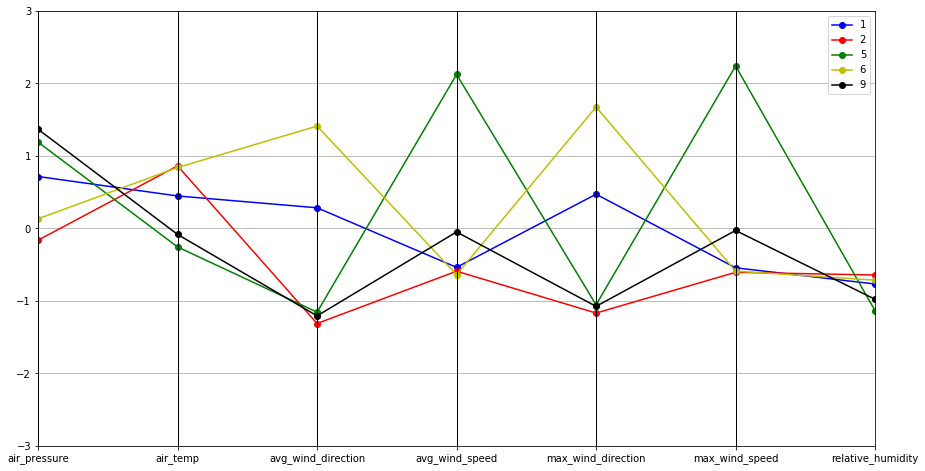

In [20]:
# Function that creates Parallel Plots
def parallel_plot(data):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(data)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')
    
parallel_plot(P[P['relative_humidity'] < -0.5])